# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1158.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           2.55e-43
Time:                        18:27:50   Log-Likelihood:                 5.7034
No. Observations:                  50   AIC:                            -3.407
Df Residuals:                      46   BIC:                             4.241
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9138      0.077     64.052      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.4035145   4.88786396  5.33311942  5.71229304  6.00813673  6.21597601
  6.34447796  6.41422731  6.45434437  6.49770066  6.57551823  6.71223996
  6.92151364  7.20394971  7.54702095  7.92712066  8.31344118  8.67303552
  8.97623043  9.20150164  9.33901024  9.39221918  9.37732434  9.32059354
  9.25405087  9.21021519  9.21675739  9.29195411  9.44168498  9.65846658
  9.92268199 10.20580373 10.47508079 10.69891952 10.85207438 10.91979569
 10.90025298 10.80483574 10.65628213 10.48494318 10.32379621 10.20302674
 10.14506909 10.1609205  10.2483343  10.39218903 10.56697288 10.74097516
 10.88149633 10.9602204 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.94517612 10.79906964 10.54132073 10.21618465  9.88191688  9.59651016
  9.40349584  9.32128588  9.33866497  9.41753644]


## Plot comparison

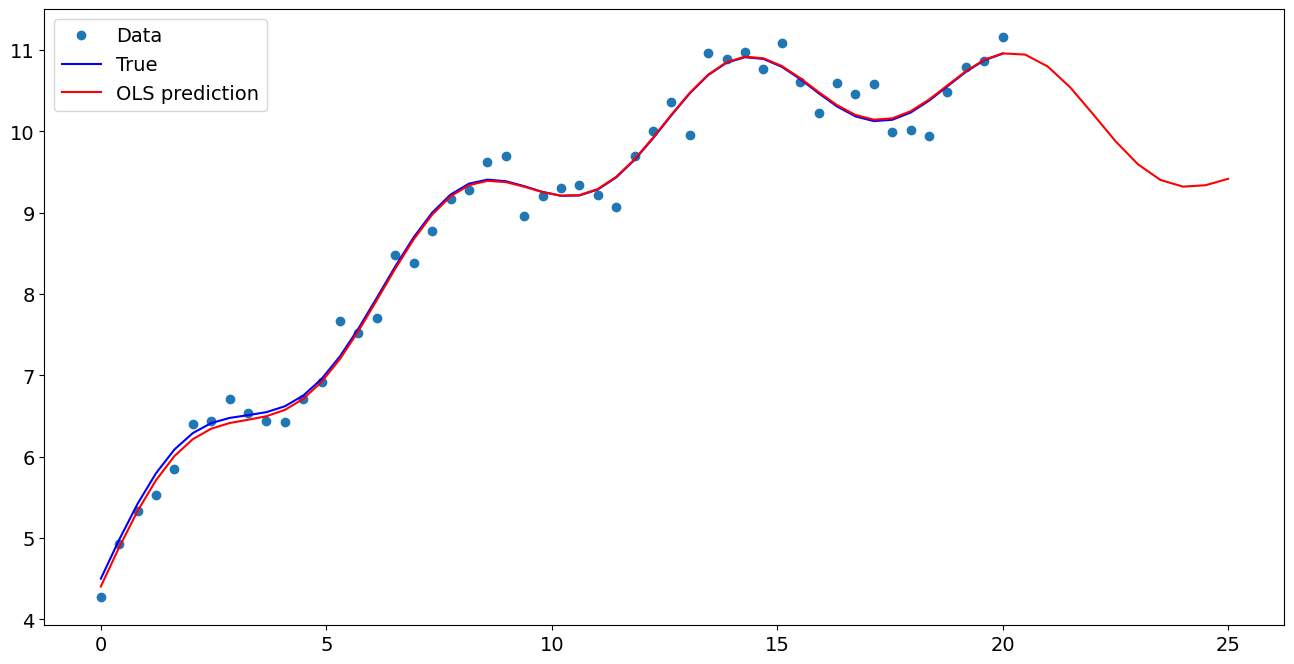

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.913756
x1                  0.509328
np.sin(x1)          0.495198
I((x1 - 5) ** 2)   -0.020410
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.945176
1    10.799070
2    10.541321
3    10.216185
4     9.881917
5     9.596510
6     9.403496
7     9.321286
8     9.338665
9     9.417536
dtype: float64